# Image Procedures
---
Procedures to produce the `image.svg`:

- Layout on Illustrator;
- Refactor the exported `template.svg` from Illustrator by hand;
- Run the notebook to output the `image.svg` file.

In [1]:
import numpy as np
from bs4 import BeautifulSoup

## Useful functions
---

In [2]:
def display_svg(data):
    from IPython.display import SVG, display
    display(SVG(data))

In [3]:
def export_svg(data, filename):
    f = open(f'{filename}.svg', "w")
    f.write(data)
    f.close()

## Read template
---
Read template file `template.svg` from Illustrator and parse object.

In [4]:
f = open("template.svg", "r")
parse = BeautifulSoup(f.read(), 'xml')
f.close()

## Set SVG elements
---

In [5]:
svg = parse.find("svg")

svg["width"] = "2000px"
svg["height"] = "600px"
svg["xmlns"] = "http://www.w3.org/2000/svg"
svg["xmlns:xlink"] = "http://www.w3.org/1999/xlink"

In [6]:
np.random.uniform(0, 1, (10, 2))*[2000, 600]

array([[1151.89442745,   37.6678078 ],
       [1716.44845453,  507.09812923],
       [1524.83950678,  385.68959163],
       [ 924.25232496,  292.18875194],
       [ 760.99773446,  266.44622966],
       [ 325.05433713,  101.6878783 ],
       [1588.34920824,  517.40939137],
       [ 137.67991624,  455.54997256],
       [  12.42812126,  286.53593949],
       [ 199.51854594,   80.81662943]])

In [7]:
np.random.seed(1)

BG = svg.find("g", {"id": "BG"})
text = BG.find("text")

points = np.random.uniform(0, 1, (256, 2))*[2000, 600]
for x, y in points:
    tspan = parse.new_tag("tspan")
    tspan["x"] = x
    tspan["y"] = y
    font_size = np.random.randint(8, 16)
    value = np.random.randint(75, 95)
    tspan["style"] = f'font-size: {font_size}px; fill: hsl(0,0%,{value}%);'
    tspan["time"] = np.random.randint(200, 2000)
    tspan.string = str(np.random.randint(10))
    text.append(tspan)

## Include BG script
---

In [8]:
script = parse.new_tag("script")
script["type"] = "text/javascript"
script.string = '''
// <![CDATA[
  const TSPAN = document.querySelectorAll("#BG > text > tspan");
  TSPAN.forEach(tspan => {
    const time = parseInt(tspan.getAttribute("time"));
    setInterval(() => {
      const current = parseInt(tspan.textContent);
      tspan.textContent = (current + 1) % 10;
    }, time);
  });
// ]]>
'''
svg.append(script)

## Display SVG
---

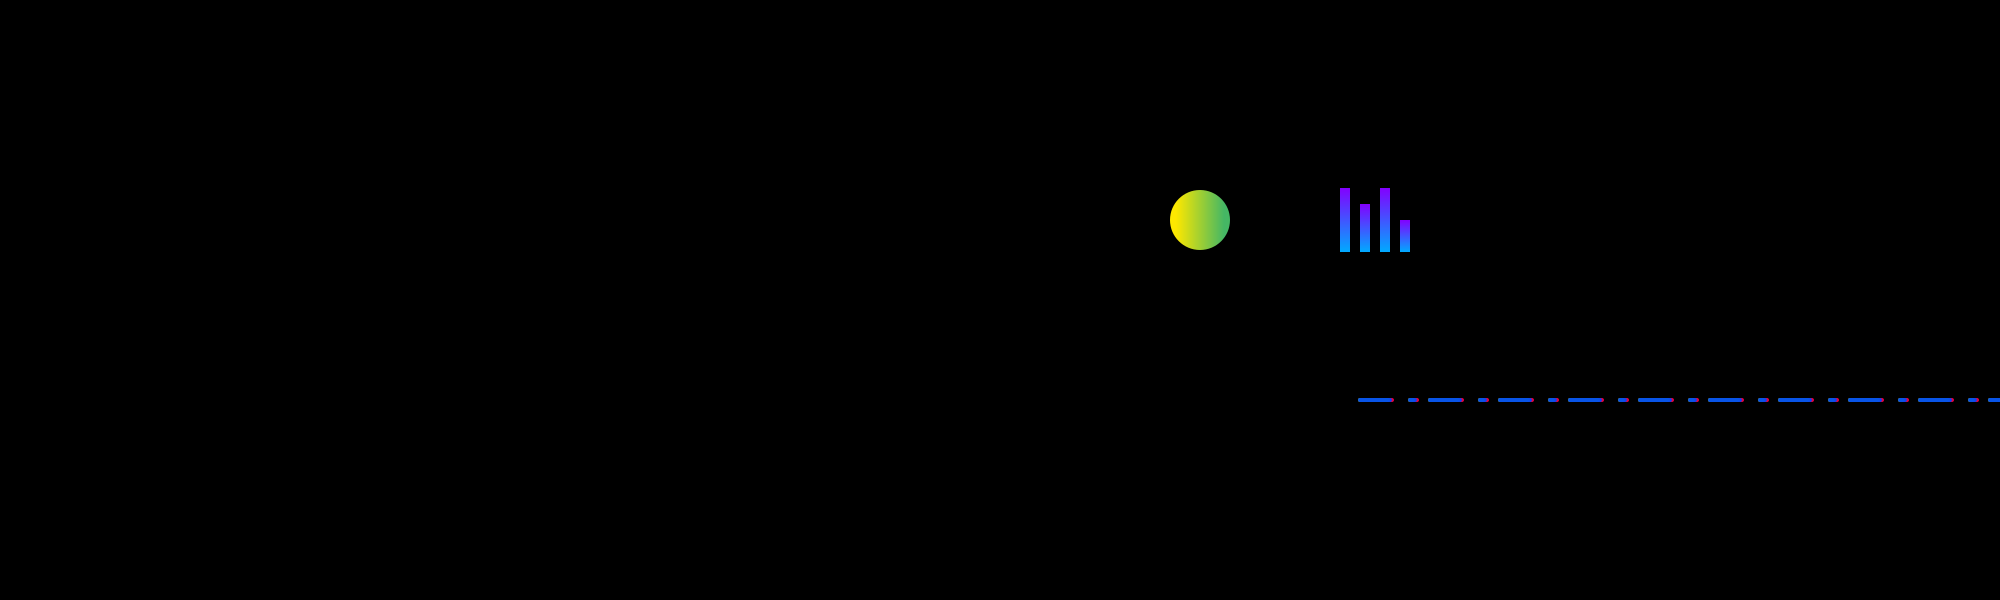

In [9]:
display_svg(str(svg))

## Export SVG
---

In [10]:
# svg_out = f'''
# <?xml version="1.0" encoding="utf-8"?>
# <!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
# {svg.prettify()}
# '''

# export_svg(svg_out, "image")